In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)

print("\nTarget classes:", data.target_names)

Feature matrix shape (X): (569, 30)
Target vector shape (y): (569,)

Target classes: ['malignant' 'benign']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split (we'll start with 80–20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


In [3]:
import tensorflow as tf
from tensorflow import keras

# Build the ANN model (2 hidden layers)
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(30,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5683 - loss: 0.7479 - val_accuracy: 0.7802 - val_loss: 0.5535
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7524 - loss: 0.5575 - val_accuracy: 0.8791 - val_loss: 0.4373
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.4732 - val_accuracy: 0.9121 - val_loss: 0.3523
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8779 - loss: 0.3738 - val_accuracy: 0.9451 - val_loss: 0.2935
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9354 - loss: 0.3045 - val_accuracy: 0.9560 - val_loss: 0.2498
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9497 - loss: 0.2522 - val_accuracy: 0.9560 - val_loss: 0.2161
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9465 - loss: 0.2291 - val_accuracy: 0.9560 - val_loss: 0.1910
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9429 - loss: 0.2127 - val_accuracy: 0.9560 - val_loss: 0.1722
Ep

In [4]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

# Predict probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Accuracy: 0.9737
Precision: 0.9857
Recall: 0.9718
F1 Score: 0.9787
AUC-ROC: 0.9957


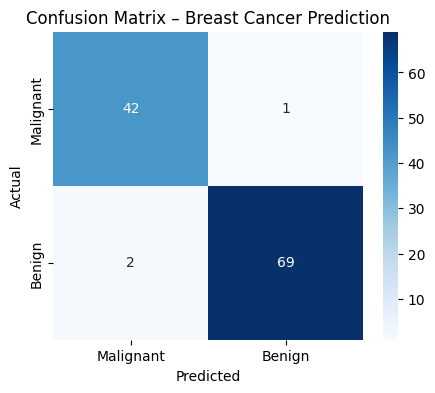

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Malignant", "Benign"],
    yticklabels=["Malignant", "Benign"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Breast Cancer Prediction")
plt.show()

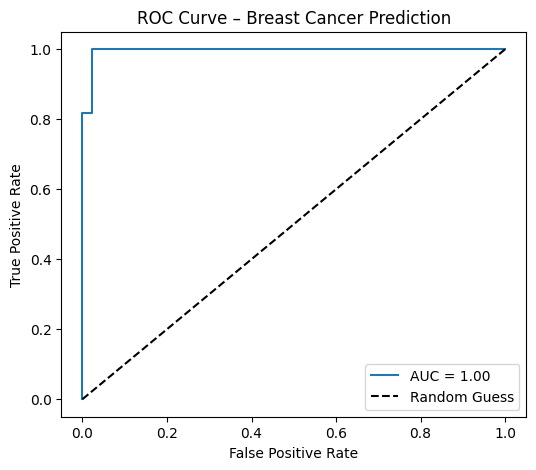

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Breast Cancer Prediction")
plt.legend(loc="lower right")
plt.show()

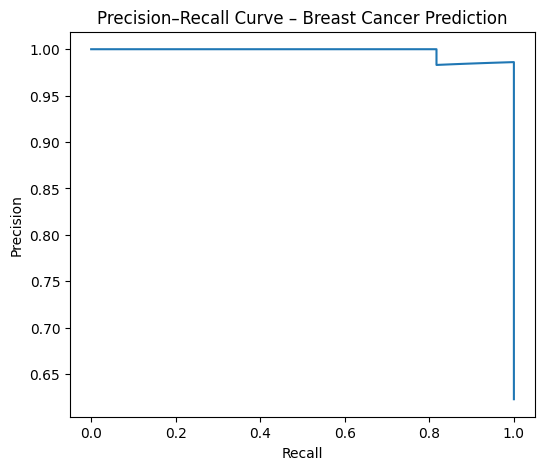

In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall values
precision_vals, recall_vals, thresholds = precision_recall_curve(
    y_test, y_pred_prob
)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Breast Cancer Prediction")
plt.show()

In [8]:
# Build a deeper ANN (3 hidden layers)
deep_model = keras.Sequential([
    keras.layers.Dense(32, activation="tanh", input_shape=(30,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile
deep_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train
history_deep = deep_model.fit(
    X_train_scaled,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6813 - loss: 0.6580 - val_accuracy: 0.8132 - val_loss: 0.5726
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8354 - loss: 0.5458 - val_accuracy: 0.8462 - val_loss: 0.4713
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8668 - loss: 0.4311 - val_accuracy: 0.8791 - val_loss: 0.3829
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8941 - loss: 0.3542 - val_accuracy: 0.8681 - val_loss: 0.3167
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9020 - loss: 0.2755 - val_accuracy: 0.8901 - val_loss: 0.2683
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9571 - loss: 0.2304 - val_accuracy: 0.9011 - val_loss: 0.2288
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9567 - loss: 0.1768 - val_accuracy: 0.9231 - val_loss: 0.1960
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9795 - loss: 0.1427 - val_accuracy: 0.9451 - val_loss: 0.1

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels using threshold 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.3772
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


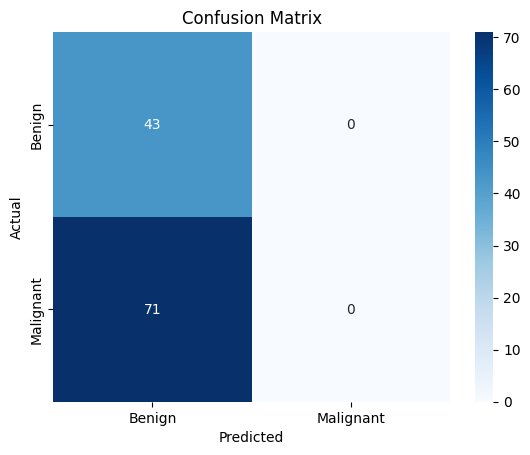

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

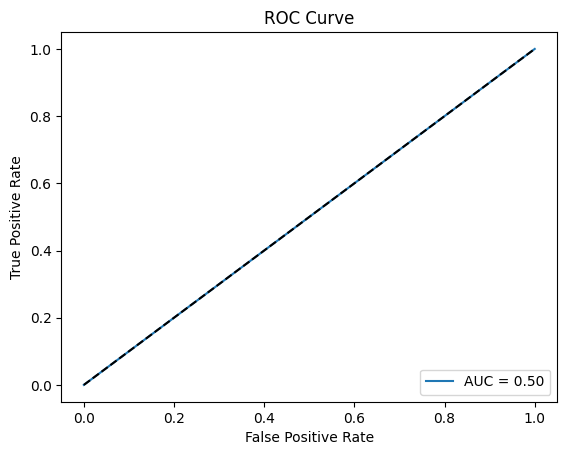

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

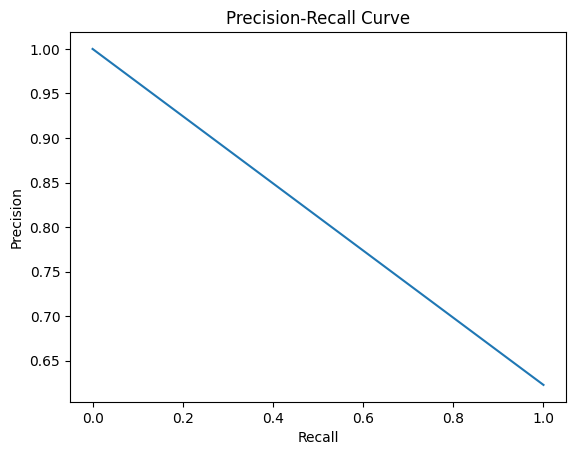

In [12]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [16]:
model.save("breast_cancer_predictor.keras")
from tensorflow import keras
model = keras.models.load_model("breast_cancer_predictor.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
# Scale X_test the same way you did for training
X_test_scaled = scaler.transform(X_test)

# Get predicted probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels (threshold = 0.5)
import numpy as np
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.9737
Precision: 0.9857
Recall: 0.9718
F1 Score: 0.9787
AUC-ROC: 0.9957


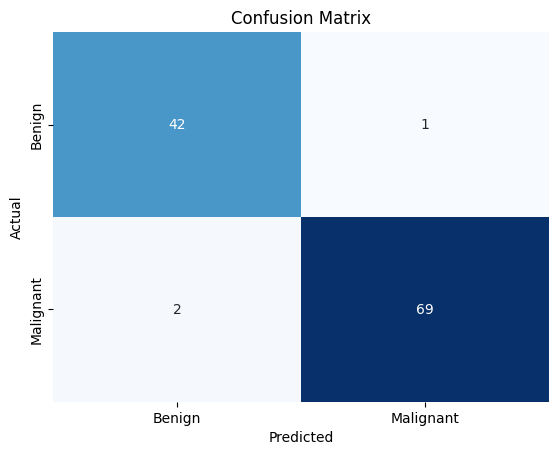

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

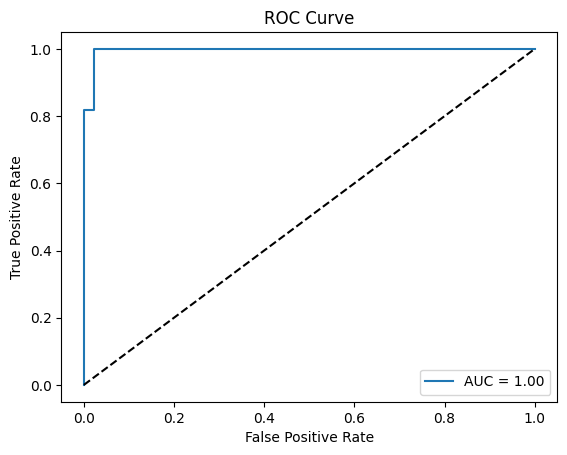

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


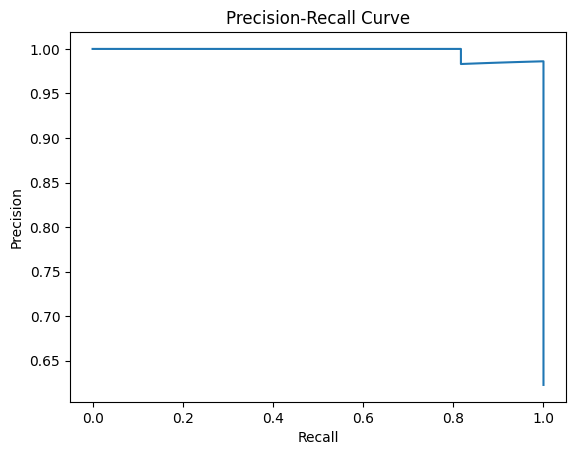

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()